In [108]:
import json
from glob import glob
import pandas as pd
import numpy as np

import requests
from io import BytesIO
from PIL import Image
from IPython.display import display

import time
import matplotlib.pyplot as plt
import seaborn as sns
import textdistance

plt.style.use('ggplot')

In [17]:
# abs path -> 22-03-07/ *.json
best = glob('22-03-07/best*.json')
item = glob('22-03-07/item*.json')
products = glob('22-03-07/products*.json')
#category1 == category2 = True
category = glob('22-03-07/category1.json')

In [5]:
def read_jsonfile(json_file):
    with open(json_file) as json_file:
        json_data = json.load(json_file)
    return json_data

In [80]:
def json2df(path_list, which_data='best'):
    """
    input:
        - path_list : a list of all the file paths
            example => ['22-03-07/bestshots2.json', '22-03-07/bestshots1.json']
        - which_data : 'best', 'item', 'products', 'category'
    output:
        concatnated DataFrame objects splitted into 2 by 'enterpriseId' => ('421B6D0E746C4E6D' and 'B57D4F97C0E44A11')
    """
    
    ent_4 = '421B6D0E746C4E6D'
    ent_b = 'B57D4F97C0E44A11'
    
    if which_data != 'category':
        df_list = []
        for file_path in path_list:
            df_list.append(pd.DataFrame(read_jsonfile(file_path)))
        
        if which_data == 'products':
            df = pd.concat(df_list).T.reset_index(drop=True)
        else:
            df = pd.concat(df_list).reset_index(drop=True)
            
        df = df.rename(columns={'enterprise_id':'enterpriseId'})
        return df.query(f'enterpriseId=="{ent_4}"').reset_index(drop=True), df.query(f'enterpriseId=="{ent_b}"').reset_index(drop=True)
    
    else:
        for file_path in path_list:
            category_json = read_jsonfile(file_path)
        return pd.DataFrame(category_json[ent_4]), pd.DataFrame(category_json[ent_b])

In [81]:
best_4, best_b = json2df(best)
items_4, items_b = json2df(item)
items_4, items_b = items_4.drop_duplicates('_id'), items_b.drop_duplicates('_id')
products_4, products_b = json2df(products, which_data='products')
category_4, category_b = json2df(category, which_data='category')

In [131]:
# 동일한 id 와 projectId의 차이?
best_4[best_4['projectId']=='X9FwT9TB461A316FD4A402F']

,awesome_score,date,datetime,enterpriseId,id,projectId,style_predictions,top_score,top_style
2,0.941246,2022-03-06,2022-03-06T09:43:33.090000,421B6D0E746C4E6D,X9enN3iCB5C02807C324267,X9FwT9TB461A316FD4A402F,"{'BOHEMIAN': 8.87e-05, 'CLASSIC_AND_ANTIQUE': ...",0.969094,MODERN
6,0.964227,2022-03-05,2022-03-05T14:35:43.296000,421B6D0E746C4E6D,X9agf9AE67D09AC5B8848F4,X9FwT9TB461A316FD4A402F,"{'BOHEMIAN': 0.000538163, 'CLASSIC_AND_ANTIQUE...",0.441593,MODERN
7,0.986274,2022-03-04,2022-03-04T09:59:16.262000,421B6D0E746C4E6D,X9UXoomF8B8B7DDDB7D446A,X9FwT9TB461A316FD4A402F,"{'BOHEMIAN': 0.072435729, 'CLASSIC_AND_ANTIQUE...",0.314823,NATURAL
21,0.930815,2022-03-03,2022-03-03T08:18:27.332000,421B6D0E746C4E6D,X9O2-GE360D53D0BA944DEF,X9FwT9TB461A316FD4A402F,"{'BOHEMIAN': 1.1178e-05, 'CLASSIC_AND_ANTIQUE'...",0.925654,MODERN
31,0.983693,2022-03-02,2022-03-02T09:23:50.210000,421B6D0E746C4E6D,X9J8WFC47ACDB187D8B421D,X9FwT9TB461A316FD4A402F,"{'BOHEMIAN': 0.006999183, 'CLASSIC_AND_ANTIQUE...",0.455669,LUXURY


In [91]:
best_b.shape, best_4.shape

((4153, 9), (415, 9))

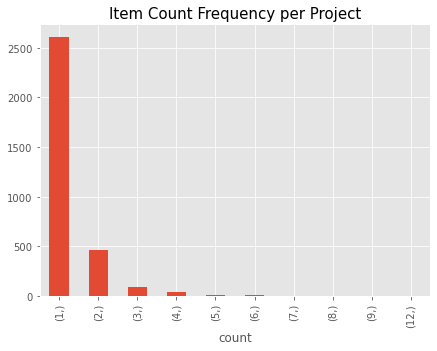

In [113]:
best_b.groupby('projectId')['projectId'].agg({'count'}).value_counts().plot(kind='bar', figsize=(7, 5))
plt.title("Item Count Frequency per Project", fontsize='15')
plt.show()

In [124]:
items_4, items_b = items_4.drop_duplicates('_id'), items_b.drop_duplicates('_id')

In [125]:
items_4.duplicated('_id').sum()

0

In [126]:
items_4.shape, items_b.shape

((345, 31), (3923, 31))

In [134]:
items_4['items']

0      [{'productId': 'X8brWeE6E8B43372F554FBC', 'pos...
1      [{'productId': 'XVjPYKP427C3D3EF6EB4F76', 'pos...
2      [{'productId': 'Xiq68wY715E2642180E4EC5', 'pos...
3      [{'productId': 'Xip8nea5D3CF56DB2974E78', 'pos...
4      [{'productId': 'XXPVCK14A74883DC6B54C90', 'pos...
                             ...                        
355    [{'productId': 'XiL9Rbl5495213F75FC4489', 'pos...
356    [{'productId': '32CB7FA2721A48A1', 'position':...
357    [{'productId': 'X1Vf72837E007D973264FFD', 'pos...
358    [{'productId': 'X1Vf72837E007D973264FFD', 'pos...
359    [{'productId': 'FB9EA7E54E064C80', 'position':...
Name: items, Length: 345, dtype: object

In [136]:
best_4[best_4['projectId']=='X9FwT9TB461A316FD4A402F']['id']

2     X9enN3iCB5C02807C324267
6     X9agf9AE67D09AC5B8848F4
7     X9UXoomF8B8B7DDDB7D446A
21    X9O2-GE360D53D0BA944DEF
31    X9J8WFC47ACDB187D8B421D
Name: id, dtype: object

In [137]:
items_4[items_4['projectId']=='X9FwT9TB461A316FD4A402F']['_id']

18    X9enN3iCB5C02807C324267
20    X9agf9AE67D09AC5B8848F4
24    X9UXoomF8B8B7DDDB7D446A
31    X9O2-GE360D53D0BA944DEF
48    X9J8WFC47ACDB187D8B421D
Name: _id, dtype: object

In [129]:
items_b.groupby(['projectId'])['_id'].get_group()

TypeError: get_group() missing 1 required positional argument: 'name'

In [127]:
items_b.head()

,_id,projectId,remainTime,renderStartTime,uuid,type,resolution,enterpriseId,userId,referenceId,...,list,background,tags,roomTag,watermark,comment,items,archive,createdAt,updatedAt
0,X9GTDhYFEFFF950DCE34D0D,X25sMcID0975F1628924AA1,00:01:41.44,2022-03-01T16:51:02.482Z,9BE9B254-E36E-49F1-95D8-18EE4670BA3C,0,"{'x': 1280, 'y': 960}",B57D4F97C0E44A11,X25ouiH160AC249E6D447A4,,...,[],1,[],4,{'image': 'https://resources.archisketch.com/e...,"{'title': '', 'body': ''}","[{'productId': 'XpB5qAs3DCF3BE520F9424E', 'pos...",None,2022-03-01T16:24:34.648Z,2022-03-01T16:51:42.351Z
1,X9F0vo018DE4CAC78CA4C15,X9BIxrAA672FCEB243F4F46,00:01:23.53,2022-03-01T14:38:25.595Z,944FE52B-3183-4F5E-B980-6729EEF94B80,0,"{'x': 1280, 'y': 720}",B57D4F97C0E44A11,X8_rS6eAB79FCB81A524C34,,...,[],1,"[02, 드리밍, 일자형, 알로소, 쇼파, 스툴, 보니애가구, 발받침대, 플렌트, ...",0,{'image': 'https://resources.archisketch.com/e...,"{'title': '', 'body': ''}","[{'productId': 'XkcFu3oEDC0CE6D6A184F93', 'pos...",None,2022-03-01T14:12:08.884Z,2022-03-01T14:38:46.672Z
2,X9Ft_FlC59F6D648E0C495A,X9FAJeXFD43D56356CA4E1A,00:02:06.99,2022-03-01T14:06:51.394Z,404B301C-888B-4D36-B9C8-4716067949A3,0,"{'x': 1920, 'y': 1080}",B57D4F97C0E44A11,X83NlLi7F18D4FEDE2942C0,,...,[],1,"[postershopkr, 와이어, 2nduniverse, 벽/천장장식, 조명, 초...",0,{'image': 'https://resources.archisketch.com/e...,"{'title': '', 'body': ''}","[{'productId': 'Xz-wAFZF3B04D05C6E84835', 'pos...",None,2022-03-01T13:42:37.157Z,2022-03-01T14:07:57.129Z
3,X9FFB2E1349684B7C7E4C53,X81rLRkAF853FCEEE29443E,00:01:35.65,2022-03-01T11:03:32.954Z,9CB3CE51-A500-4EBC-8F10-09CA6E864C41,0,"{'x': 1280, 'y': 720}",B57D4F97C0E44A11,X8mHUKQEB943E814D544DFC,,...,[],1,[],4,{'image': 'https://resources.archisketch.com/e...,"{'title': '', 'body': ''}","[{'productId': 'XkM8W4GBBFC245D5231498B', 'pos...",None,2022-03-01T10:43:40.548Z,2022-03-01T11:04:09.247Z
4,X9Eq7YR75291CAB389F48E6,X8xAD1H9D8553BA1D134EFA,00:02:52.37,2022-03-01T09:14:32.577Z,9AA830E7-1A4C-4EBF-B1A7-62C1C2820F1F,0,"{'x': 2560, 'y': 1440}",B57D4F97C0E44A11,X8wyESp79D08B014BD7425C,,...,[],1,"[렌지대, 가공목(mdf 외), PIDOR, F5NATURE, 수납, 데스커, 마켓...",0,{'image': 'https://resources.archisketch.com/e...,"{'title': '', 'body': ''}","[{'productId': 'XdrPW7XB36F172C7BAC4D96', 'pos...",None,2022-03-01T08:49:38.321Z,2022-03-01T09:16:09.779Z
